## 線形回帰（最小二乗法）

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [2]:
shoe = np.array([24.5, 28.0, 26.0, 25.5, 25.0, 24.0])
height = np.array([165.4, 182.7, 171.6, 173.1, 175.1, 170.6])

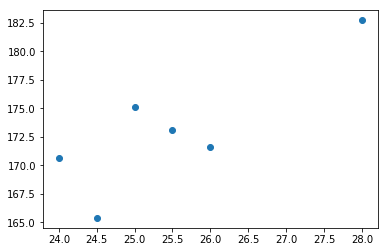

In [3]:
plt.scatter(shoe, height);

In [4]:
# shoe-heightデータ間の相関関数行列 (p.142)
# 相関自体は、回帰モデルとは無関係なことに注意（cf.決定係数）
np.corrcoef(shoe, height)

array([[1.       , 0.8322933],
       [0.8322933, 1.       ]])

In [5]:
shoe*height

array([4052.3 , 5115.6 , 4461.6 , 4414.05, 4377.5 , 4094.4 ])

In [6]:
xy_bar = np.mean(shoe*height)
xy_bar

4419.241666666666

In [7]:
x_bar_y_bar = np.mean(shoe)*np.mean(height)
x_bar_y_bar

4413.625

In [8]:
x2_bar = np.mean(shoe**2)
x2_bar

651.9166666666666

In [9]:
x_bar2 = np.mean(shoe)**2
x_bar2

650.25

In [10]:
a = (xy_bar-x_bar_y_bar)/(x2_bar-x_bar2)
a

3.3699999999996035

In [11]:
b = np.mean(height) - a*np.mean(shoe)
b

87.14833333334346

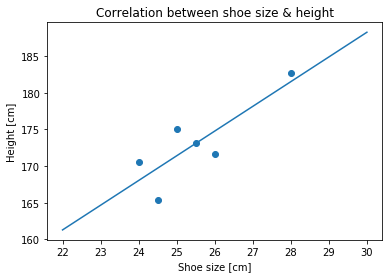

In [12]:
def lsf(x, a, b):
    return a*x+b

plt.scatter(shoe, height)
xs=np.arange(22,31)
plt.plot(xs, lsf(xs, a, b))

plt.title("Correlation between shoe size & height")
plt.xlabel("Shoe size [cm]")
plt.ylabel("Height [cm]");

## 決定係数 ($R^2$)
回帰モデルで実データをどの程度説明できるかを示す指標
$$R^2 = \frac{S_R}{S_T}$$
ここで、
$$ S_R = \displaystyle \sum_{i = 1}^n {\left(Y_i - \overline{y} \right)}^2,
S_T = \displaystyle \sum_{i = 1}^n {\left(y_i - \overline{y} \right)}^2 $$ である。
ただし、$S_R$は回帰変動、$S_T$は全体変動、$y_i$ は $n$ 個のデータ中の $i$ 番目の実測値、$\bar{y}$ は実測値 $y$ の平均、$Y_i$ は回帰モデルによる推定値を表す。
**直線で回帰するモデルの場合には**、結果として決定係数は、回帰モデルとは無関係に定義される相関係数の2乗となる。

In [13]:
Y = lsf(shoe, a, b)
Sr = np.sum((Y-np.mean(height))**2)
St = np.sum((height-np.mean(height))**2)
R2 = Sr/St
R2

0.6927121349203926

In [14]:
# 相関係数の2乗
np.corrcoef(shoe, height)[1][0]**2

0.6927121349205542

## 【発展】行列を用いた一般化
    重回帰 or 多項式への回帰にも容易に拡張可能。

In [15]:
# （例1）上と同じ問題を計画行列（デザイン行列）を用いて実装
shoe = np.array([24.5, 28.0, 26.0, 25.5, 25.0, 24.0])
height = np.array([165.4, 182.7, 171.6, 173.1, 175.1, 170.6])

def phi_1(x):
    return [1, x]

design = np.array([phi_1(k) for k in shoe])
print(design.shape)
print(design)

(6, 2)
[[ 1.  24.5]
 [ 1.  28. ]
 [ 1.  26. ]
 [ 1.  25.5]
 [ 1.  25. ]
 [ 1.  24. ]]


[87.14833333  3.37      ]


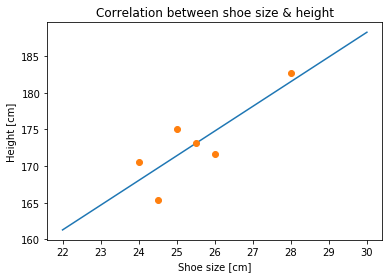

In [16]:
#　係数ベクトル b の計算
w = np.dot(np.linalg.inv(np.dot(design.T, design)), np.dot(design.T, height))
print(w)

#　回帰曲線の描画準備
x_reg = np.arange(22, 31)
y_reg = [np.dot(w, phi_1(shoe)) for shoe in x_reg]

#　データと回帰曲線の描画
plt.plot(x_reg, y_reg)
plt.plot(shoe, height, "o")
plt.title("Correlation between shoe size & height")
plt.xlabel("Shoe size [cm]")
plt.ylabel("Height [cm]");

In [17]:
# （例）二次関数の回帰
np.random.seed(100)
x = np.arange(-10,11)
noise=np.random.normal(0, 1, 21)
y = 2 + x * (1 + noise*1.5) + x * x

In [18]:
def phi_2(x):
    return [1, x, x*x]

design = np.array([phi_2(k) for k in x])
print(design.shape)
print(design[:6])

(21, 3)
[[  1 -10 100]
 [  1  -9  81]
 [  1  -8  64]
 [  1  -7  49]
 [  1  -6  36]
 [  1  -5  25]]


[-0.0756621   1.08572245  1.07896157]


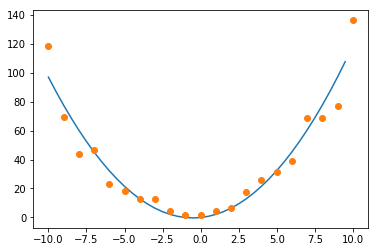

In [19]:
#　係数ベクトル b の計算
w = np.dot(np.linalg.inv(np.dot(design.T, design)), np.dot(design.T, y))
print(w)

#　回帰曲線の描画準備
x_reg = np.arange(x.min(), x.max(), 0.5)
y_reg = [np.dot(w, phi_2(x)) for x in x_reg]

#　データと回帰曲線の描画
plt.plot(x_reg, y_reg)
plt.plot(x, y, "o");

In [20]:
# 参考情報：
# https://mathtrain.jp/leastsquarematrix
# ここで現れる1列目に1が並ぶ行列は、計画行列またはデザイン行列と呼ばれます。